In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("retencion-por-mes.csv")
data2=pd.read_csv("retencion-por-trimestre.csv")

In [4]:
data.head()

,Cliente,Estado Cliente,Mes Registro,Mes de Abandono (Churn),1/2019,2/2019,3/2019,4/2019,5/2019,6/2019,...,3/2020,4/2020,5/2020,6/2020,7/2020,8/2020,9/2020,10/2020,11/2020,12/2020
0,George Garcia,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,James Johnson,Churned,1/2019,3/2019,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,John Williams,Churned,1/2019,8/2019,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Robert Jones,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Michael Brown,Active,1/2019,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
# Se pueden observar los datos y el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cliente                  330 non-null    object 
 1   Estado Cliente           330 non-null    object 
 2   Mes Registro             330 non-null    object 
 3   Mes de Abandono (Churn)  99 non-null     object 
 4   1/2019                   11 non-null     float64
 5   2/2019                   24 non-null     float64
 6   3/2019                   36 non-null     float64
 7   4/2019                   50 non-null     float64
 8   5/2019                   62 non-null     float64
 9   6/2019                   71 non-null     float64
 10  7/2019                   82 non-null     float64
 11  8/2019                   83 non-null     float64
 12  9/2019                   85 non-null     float64
 13  10/2019                  97 non-null     float64
 14  11/2019                  1

Cambiamos nuestras variables categoricas: object -->  category

Vamos a relizar una categorizacion de los datos de los clientes que pagan su renta mensual y los que no, para que se pueda realizar un mejor analisis con Pandas.

In [6]:
data['Estado Cliente']= data['Estado Cliente'].astype('category')

Es importante resaltar que si: 

Mes Abandono = NUll --> sigue activo

Mes Abandono = 1 --> inactivo

In [7]:
# Convertimos la columna 'Mes de Abandono (Churn)' y 'Mes Registro' en un formato de fecha
data['Mes de Abandono (Churn)'] = pd.to_datetime(data['Mes de Abandono (Churn)'])
data['Mes Registro'] = pd.to_datetime(data['Mes Registro'])

# Truncar las columnas al mes --> y se vuelve a convertir los datos a tipo object
data['Mes de Abandono (Churn)'] = data['Mes de Abandono (Churn)'].dt.strftime('%Y-%m')
data['Mes Registro'] = data['Mes Registro'].dt.strftime('%Y-%m')

In [8]:
# Cuenta el número de clientes por mes de inicio
clientes_por_mes_inicio = data.groupby('Mes Registro').size()

# Cuenta el número de clientes por mes de fin
clientes_por_mes_fin = data.groupby('Mes de Abandono (Churn)').size()

# Ordena los datos por fecha
clientes_por_mes_fin = clientes_por_mes_fin.sort_index()

# Imprime los resultados
print("Clientes por Mes de Inicio:")
print(clientes_por_mes_inicio)
print("\nClientes por Mes de Fin:")
print(clientes_por_mes_fin)


Clientes por Mes de Inicio:
Mes Registro
2019-01    11
2019-02    13
2019-03    13
2019-04    15
2019-05    13
2019-06    11
2019-07    11
2019-08     4
2019-09     8
2019-10    15
2019-11    13
2019-12     6
2020-01    21
2020-02    11
2020-03    11
2020-04    16
2020-05    25
2020-06    22
2020-07    21
2020-08    27
2020-09     5
2020-10    12
2020-11    10
2020-12    16
dtype: int64

Clientes por Mes de Fin:
Mes de Abandono (Churn)
2019-03     1
2019-04     1
2019-05     1
2019-06     2
2019-08     3
2019-09     6
2019-10     3
2019-11     3
2019-12     1
2020-01     4
2020-02     4
2020-03     3
2020-04     4
2020-05     7
2020-06     8
2020-07     3
2020-08     4
2020-09    15
2020-10     6
2020-11     9
2020-12    11
dtype: int64


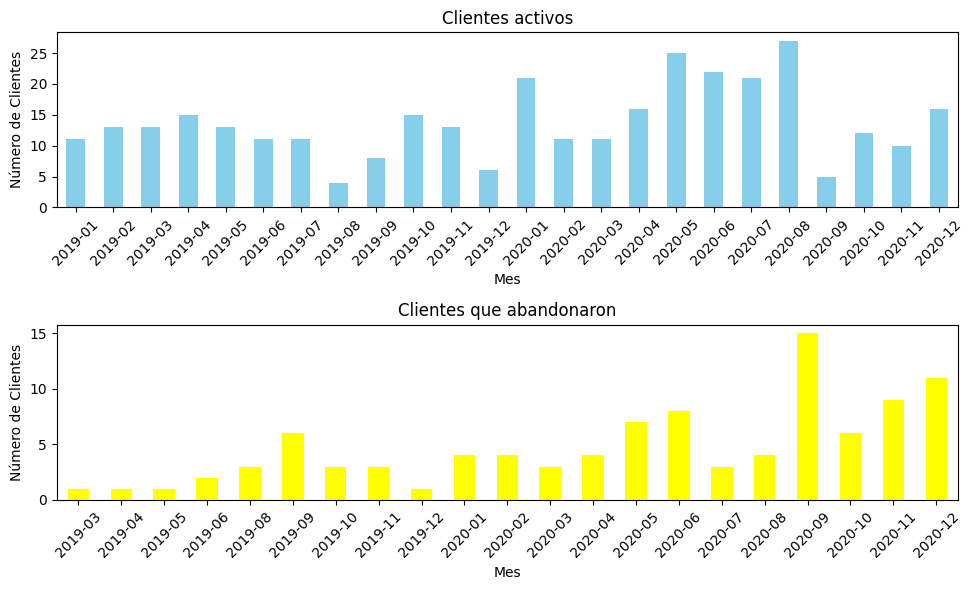

In [9]:
# Crea un gráfico de barras para mostrar el número de clientes por mes
plt.figure(figsize=(10, 6))

# Subplot para el gráfico de clientes activos por mes
plt.subplot(2, 1, 1)
clientes_por_mes_inicio.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.title('Clientes activos')
plt.xticks(rotation=45)


# Contar el número de valores NaN en cada columna de los meses de abandono
clientes_abandono_por_mes = clientes_por_mes_fin

# Subplot para el gráfico de clientes que abandonaron mes a mes
plt.subplot(2, 1, 2)
clientes_abandono_por_mes.plot(kind='bar', color='yellow')
plt.title('Clientes que abandonaron')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)  # Rotar los nombres de los meses para mejor visualización

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()


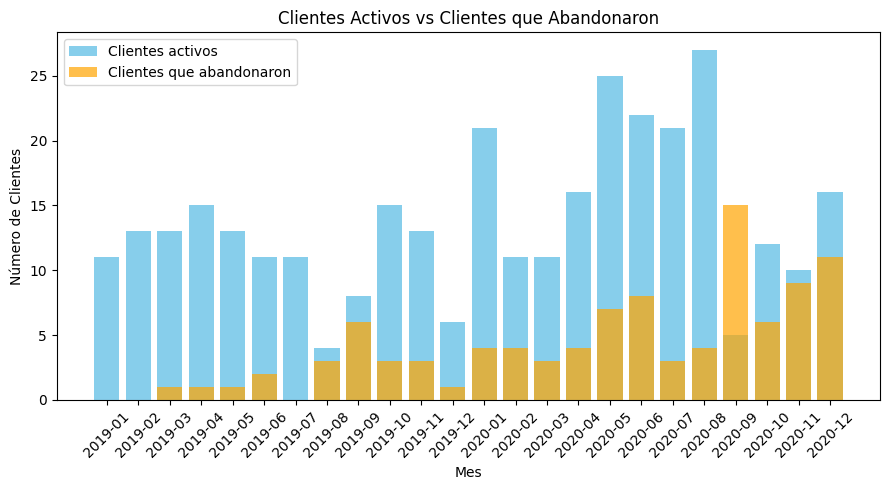

In [11]:
# Crea una figura y ejes
plt.figure(figsize=(9, 5))

# Graficar el número de clientes activos por mes
plt.bar(clientes_por_mes_inicio.index, clientes_por_mes_inicio.values, color='skyblue', label='Clientes activos')

# Graficar el número de clientes que abandonaron mes a mes, superponiendo el mismo eje
plt.bar(clientes_abandono_por_mes.index, clientes_abandono_por_mes.values, color='orange', alpha=0.7, label='Clientes que abandonaron')

# Establecer etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.title('Clientes Activos vs Clientes que Abandonaron')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [12]:
def Clientes_por_Mes(mes: str):
    try:
        # Verifica si la columna mes existe en el DataFrame
        if mes not in data.columns:
            raise KeyError("El nombre de la columna '{}' no es válido. Por favor, asegúrate de ingresar el nombre correcto de la columna. ".format(mes))

        # Filtra el DataFrame por el mes especificado
        data_filtered = data[mes]

        if not data_filtered.empty:
            # Realiza una función de agregación para el mes especificado
            numero_clientes = data_filtered.sum()
            return {
                "El número de clientes para el mes {} es:".format(mes): numero_clientes
            }
        else:
            return {
                "El número de clientes para el mes {} es:".format(mes): 0  # Si no hay clientes, el número es cero
            }
    except KeyError:
        # Si hay un error de clave (KeyError), proporciona mensajes de error
        # Calculamos el mínimo y el máximo de las fechas si las columnas existen
        if 'Mes Registro' in data.columns and 'Mes de Abandono (Churn)' in data.columns:
            fecha_minima = data['Mes Registro'].min()
            fecha_maxima = data['Mes de Abandono (Churn)'].max()

            # Truncamos la fecha a Año-Mes
            fecha_minima_truncada = fecha_minima.strftime('%Y-%m')
            fecha_maxima_truncada = fecha_maxima.strftime('%Y-%m')

            
            print("El nombre de la columna '{}' no es válido. Por favor, asegúrate de ingresar el nombre correcto de la columna.".format(mes))
            print("\nEl formato de las fechas es: M/YYYY. Los registros comienzan en {} y terminan en {}.".format(fecha_minima_truncada, fecha_maxima_truncada))

        else:
            
            print("La columna a la que intentas ingresar no es valida")
        

#Debe devolver el número de clientes para el mes especificado.
#Ejemplo de retorno: {"El número de clientes para el mes X es" : 11}

In [13]:
# Ejemplo de uso
Numero_de_clientes = Clientes_por_Mes('2/2019')
print(Numero_de_clientes)

{'El número de clientes para el mes 2/2019 es:': 24.0}


In [19]:
def Mes_mayorClientes(data):
    # Diccionario para almacenar el recuento de nuevos clientes por mes
    nuevos_clientes_por_mes = {}

    # Iterar sobre las columnas del DataFrame para contar los nuevos clientes por mes
    for i, columna in enumerate(data.columns[4:], start=1):
        # Filtrar clientes nuevos para el mes actual
        clientes_mes_actual = data[columna].dropna()
        # Excluir clientes que ya estaban registrados en el mes anterior (si corresponde)
        if i > 1:  # Excluir el primer mes
            clientes_mes_anterior = data[data.columns[i - 1]].dropna()
            clientes_mes_actual = clientes_mes_actual[~clientes_mes_actual.isin(clientes_mes_anterior)]
        # Contar el número de nuevos clientes para el mes actual
        count = len(clientes_mes_actual)
        # Almacenar el recuento en el diccionario
        nuevos_clientes_por_mes[columna] = count

    # Encontrar el mes con el segundo mayor recuento de nuevos clientes
    mes_mas_clientes = sorted(nuevos_clientes_por_mes, key=nuevos_clientes_por_mes.get, reverse=True)[1]
    num_clientes = nuevos_clientes_por_mes[mes_mas_clientes]

    return {
        "Mes con mayor número de nuevos clientes": mes_mas_clientes,
        "Número de nuevos clientes en el mes": num_clientes
    }


In [17]:
# Llamada a la función con tu DataFrame
MayorNuevos = Mes_mayorClientes(data)
print(MayorNuevos)

{'Mes con mayor número de nuevos clientes': '3/2019', 'Número de nuevos clientes en el mes': 36}


In [1]:
def Mes_mayor_abandono(data):
    # Diccionario para almacenar el recuento de abandono de clientes por mes
    abandono_por_mes = {}

    # Iterar sobre las columnas del DataFrame para contar el abandono de clientes por mes
    for i, columna in enumerate(data.columns[4:], start=1):  # Excluir el primer mes
        # Filtrar clientes activos para el mes actual
        clientes_mes_actual = data[data[columna].isnull()]
        #clientes_mes_actual = data[columna].dropna()
        # Filtrar clientes activos para el mes anterior
        if i > 1:
            clientes_mes_anterior = data[data[data.columns[i-1]].notna()]
            # Excluir clientes que ya habían abandonado en el mes anterior
            clientes_mes_actual = clientes_mes_actual[~clientes_mes_actual.index.isin(clientes_mes_anterior.index)]
        # Contar el número de clientes abandonados para el mes actual
        count = len(clientes_mes_actual)
        # Almacenar el recuento en el diccionario
        abandono_por_mes[columna] = count

    # Encontrar el mes con el mayor recuento de abandono de clientes
    mes_con_mayor_abandono = max(abandono_por_mes, key=abandono_por_mes.get)
    num_clientes_abandonados = abandono_por_mes[mes_con_mayor_abandono]

    return {
        "Mes con mayor abandono de clientes": mes_con_mayor_abandono,
        "Número de clientes abandonados en ese mes": num_clientes_abandonados
    }

In [81]:
# Llamada a la función con tu DataFrame
resultado_abandono = Mes_mayor_abandono(data)
print(resultado_abandono)

{'Mes con mayor abandono de clientes': '8/2020', 'Número de clientes abandonados en ese mes': 93}


In [21]:
def Porcentaje_Retencion_Abandono(data):
    # Inicializar listas para almacenar los porcentajes de retención y abandono mes a mes
    porcentajes_retencion = []
    porcentajes_abandono = []

    # Iterar sobre las columnas del DataFrame
    for columna in data.columns[4:]:
        # Filtrar clientes activos y churned para el mes actual
        clientes_activos = data[data[columna] == 1] #Esta activo cuando es 1
        clientes_inactivos = data[data[columna].isna()] #inactivo cuando es NaN

        # Contar el número de clientes activos y abandonados para el mes actual
        count_activos = len(clientes_activos)
        count_abandonados = len(clientes_inactivos)

        # Calcular el porcentaje de retención y abandono para el mes actual
        total_clientes_mes = count_activos + count_abandonados
        porcentaje_retencion_mes = (count_activos / total_clientes_mes) * 100
        porcentaje_abandono_mes = (count_abandonados / total_clientes_mes) * 100

        # Almacenar los porcentajes mes a mes
        porcentajes_retencion.append(porcentaje_retencion_mes)
        porcentajes_abandono.append(porcentaje_abandono_mes)

    # Calcular el promedio de los porcentajes de retención y abandono de todos los meses
    promedio_retencion = sum(porcentajes_retencion) / len(porcentajes_retencion)
    promedio_abandono = sum(porcentajes_abandono) / len(porcentajes_abandono)

    return {
        "Porcentaje promedio de retención de clientes": promedio_retencion,
        "Porcentaje promedio de abandono de clientes": promedio_abandono
    }

In [24]:
# Llamada a la función con tu DataFrame
resultado_2 = Porcentaje_Retencion_Abandono(data)
print(resultado_2)

{'Porcentaje promedio de retención de clientes': 39.07828282828283, 'Porcentaje promedio de abandono de clientes': 60.921717171717184}
